In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [21]:
df = pd.read_csv('netflix_ratings_data.csv', sep = ',')

In [22]:
df['splitted_genre'] = df['genres'].str.split(',')
genre_df = pd.DataFrame({'col':df['splitted_genre']})
genre_df = genre_df.explode('col')

In [23]:
genre_df = genre_df.drop_duplicates()
genre_df = genre_df.drop([372])
genre_data = genre_df.reset_index(drop=True)

In [24]:
title_genre = df[['title','splitted_genre']]

In [25]:
title_genre_2 = title_genre.copy()
title_genre_2 =title_genre_2.explode('splitted_genre') 

In [26]:
genre_title_count = title_genre_2.groupby('splitted_genre').size().reset_index(name='counts')

In [27]:
genre_title_count = genre_title_count.sort_values(by = 'counts', ascending = True)

In [28]:
genre_title_count = genre_title_count[(genre_title_count['splitted_genre']!='\\N') & (genre_title_count['splitted_genre']!='Adult')]

<ipython-input-29-778378323164>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='blue',


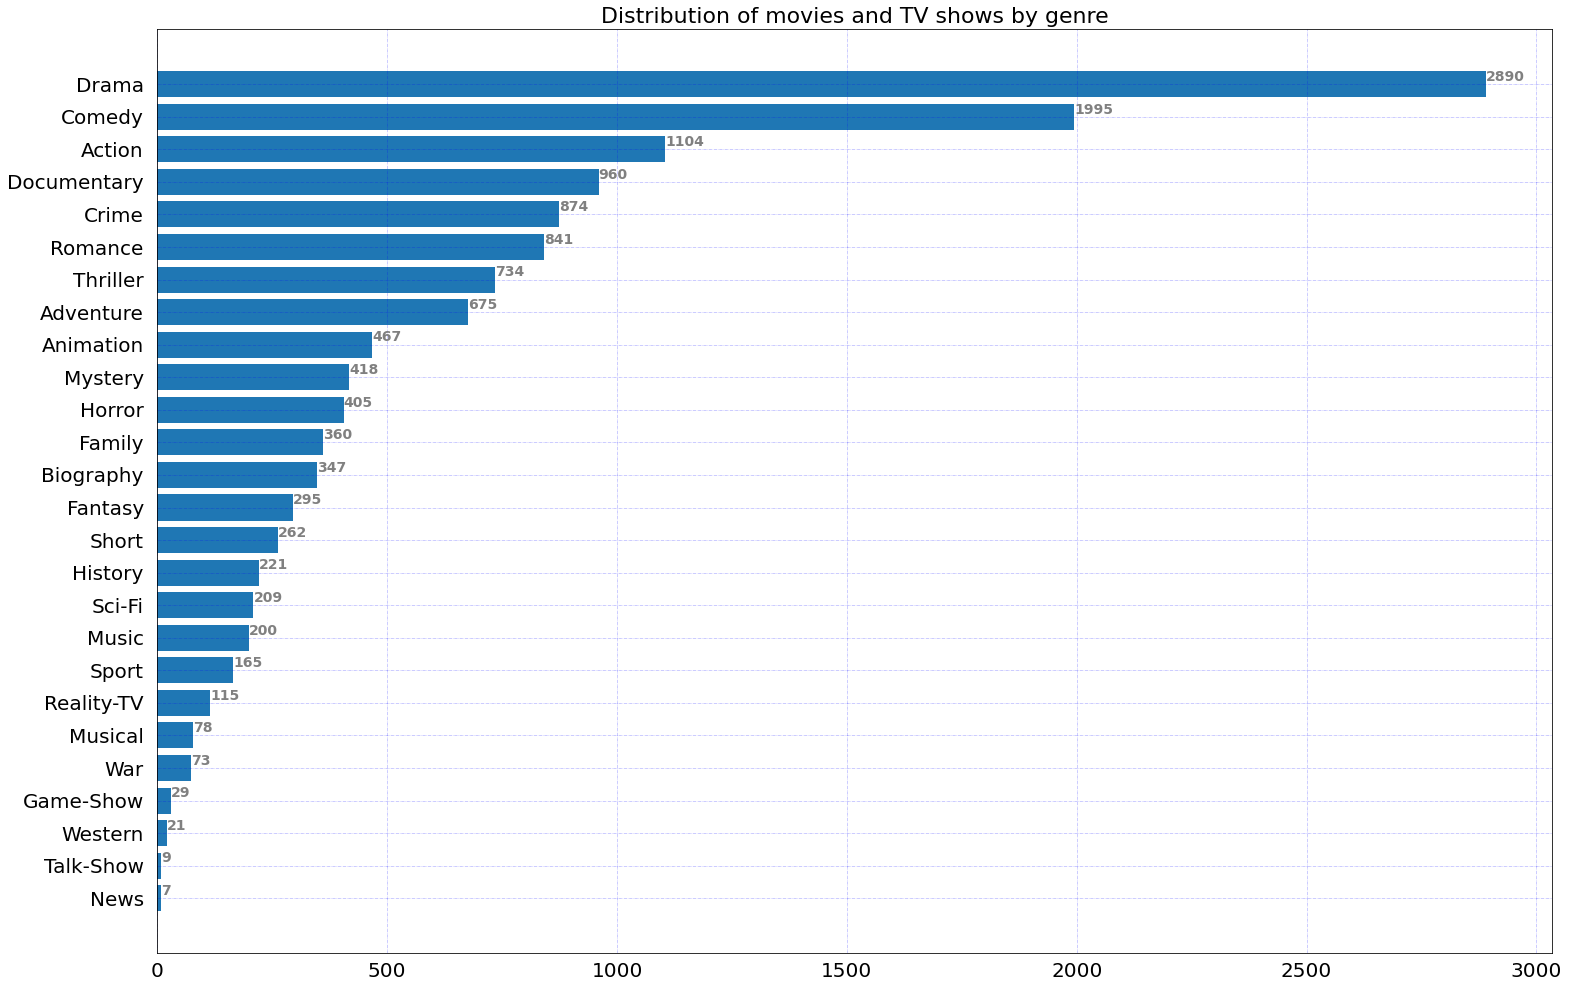

In [29]:
#Reference: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
genre = genre_title_count['splitted_genre']
number_of_titles = genre_title_count['counts']
fig, ax = plt.subplots(figsize =(25, 17))
ax.barh(genre, number_of_titles)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='blue',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 14, fontweight ='bold',
             color ='grey')
ax.set_title('Distribution of movies and TV shows by genre', loc = 'center',fontsize = 22,)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.savefig('bar_plot_title_distribution.png')
plt.show()



In [30]:
title_genre_4 = df[['splitted_genre','averageRating', 'year']]
title_genre_4 = title_genre_4.explode('splitted_genre')
yearly_groupped = title_genre_4.groupby('year').size().reset_index(name = 'count')

In [31]:
yearly_groupped = yearly_groupped[yearly_groupped['year'] > 2000]
subset_year = title_genre_4[title_genre_4['year']>2000]
subset_year = subset_year.set_index('year')

In [32]:
subset_year = subset_year.groupby(['splitted_genre','year'])['averageRating'].mean().reset_index()


In [33]:
subset_year =subset_year.set_index('splitted_genre')

In [34]:
subset_year_2 = subset_year.loc[['Action', 'Comedy','Drama','Documentary','Crime',
                                 'Romance','Thriller','Adventure','Animation','Horror','Mystery']].reset_index()

In [35]:
list_p =[]
genre_list = ['Action', 'Comedy','Drama','Documentary','Crime',
                                 'Romance','Thriller','Adventure','Animation', 'Horror', 'Mystery']
for i in genre_list:
    subset_genre = subset_year_2[subset_year_2['splitted_genre']==i] 
    normal_cal = stats.normaltest(subset_genre['averageRating']).pvalue
    print(i, normal_cal)
subset_year_2 = subset_year_2[(subset_year_2['year']!=2003) & (subset_year_2['year']!=2004)]

Action 0.32721797852539664
Comedy 0.5939379239282525
Drama 0.20523230633865158
Documentary 0.8761377953491402
Crime 0.640618042646904
Romance 0.975610596313673
Thriller 0.023222021340301373
Adventure 0.1321726960675279
Animation 0.005430939095576014
Horror 2.2210223442360937e-05
Mystery 0.03305830610319644


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
genre_list = ['Action', 'Comedy','Drama','Documentary','Crime',
                                 'Romance','Thriller','Adventure','Animation']
action_df = subset_year_2[subset_year_2['splitted_genre']=='Action'].drop(columns=['year'])
drama_df = subset_year_2[subset_year_2['splitted_genre']=='Drama'].drop(columns=['year'])
documentary_df = subset_year_2[subset_year_2['splitted_genre']=='Documentary'].drop(columns=['year'])
romance_df = subset_year_2[subset_year_2['splitted_genre']=='Romance'].drop(columns=['year'])
comedy_df = subset_year_2[subset_year_2['splitted_genre']=='Comedy'].drop(columns=['year'])
adventure_df = subset_year_2[subset_year_2['splitted_genre']=='Adventure'].drop(columns=['year'])
crime_df = subset_year_2[subset_year_2['splitted_genre']=='Crime'].drop(columns=['year'])


In [37]:
initial_levene_p = stats.levene(action_df['averageRating'], drama_df['averageRating'], documentary_df['averageRating'], romance_df['averageRating'],
                                comedy_df['averageRating'],adventure_df['averageRating'], crime_df['averageRating']).pvalue
print(initial_levene_p)

0.11909002489321913


Anova p-value:  9.656284532297942e-23
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     action   adventure    0.085    0.9 -0.1481  0.3181  False
     action      comedy   -0.003    0.9 -0.2361  0.2301  False
     action       crime   0.2527 0.0244  0.0196  0.4858   True
     action documentary   0.8717  0.001  0.6386  1.1048   True
     action       drama   0.3917  0.001  0.1586  0.6248   True
     action     romance   0.1758 0.2718 -0.0573  0.4089  False
  adventure      comedy   -0.088    0.9 -0.3211  0.1451  False
  adventure       crime   0.1677  0.327 -0.0654  0.4008  False
  adventure documentary   0.7867  0.001  0.5536  1.0198   True
  adventure       drama   0.3067 0.0025  0.0736  0.5398   True
  adventure     romance   0.0908    0.9 -0.1423  0.3239  False
     comedy       crime   0.2557 0.0218  0.0226  0.4887   True
     comedy docum

<ipython-input-39-b0e00922c9b1>:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='blue',


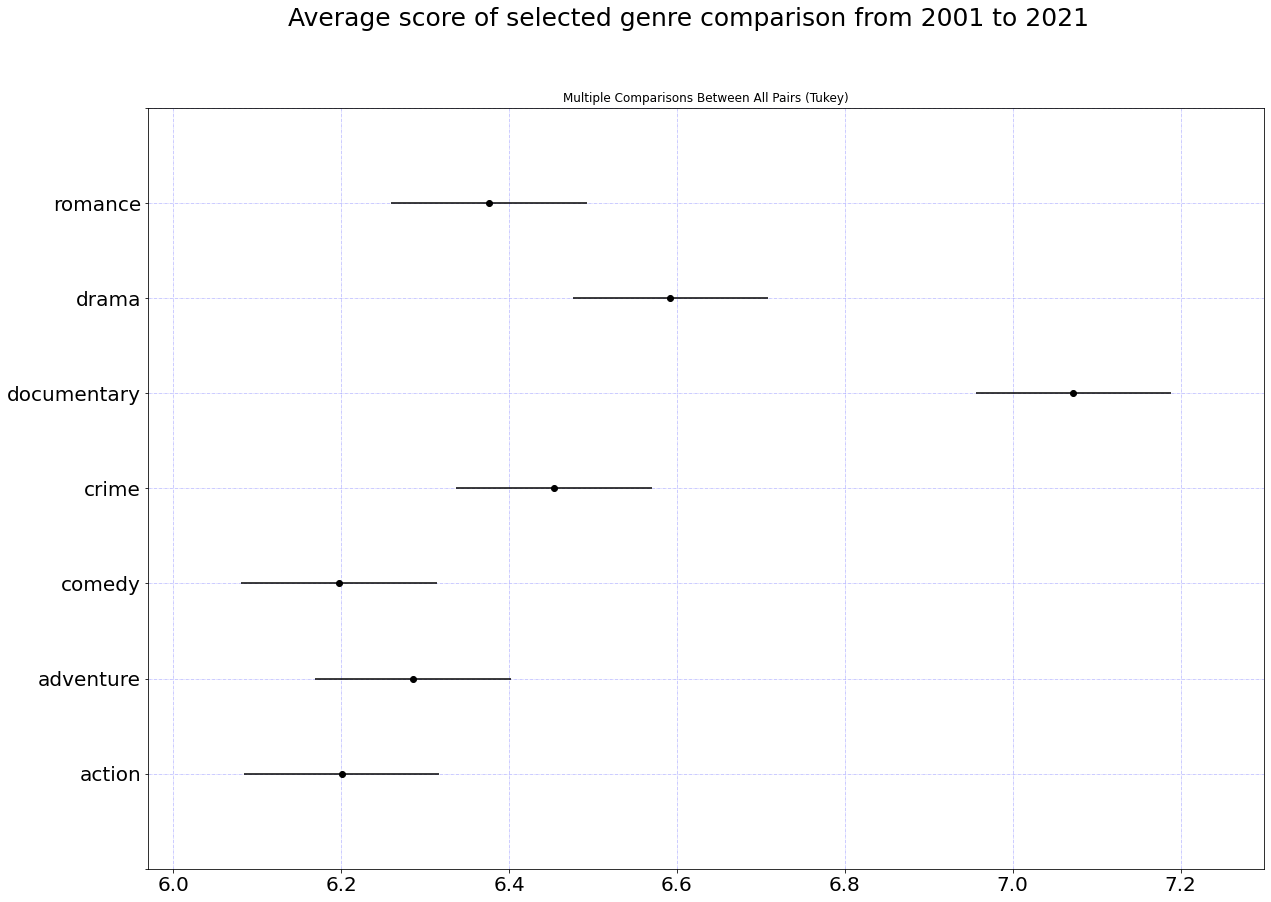

In [39]:
#They have equal variance=>Proceed with ANOVA test
anova = stats.f_oneway(action_df['averageRating'],      drama_df['averageRating'],
                       documentary_df['averageRating'], romance_df['averageRating'],
                       comedy_df['averageRating'],     adventure_df['averageRating'], 
                       crime_df['averageRating'])
print("Anova p-value: ", anova.pvalue)

data = pd.DataFrame({'action': action_df['averageRating'].tolist(),
                        'drama': drama_df['averageRating'].tolist(),
                        'documentary': documentary_df['averageRating'].tolist(),
                        'romance': romance_df['averageRating'].tolist(),
                        'comedy': comedy_df['averageRating'].tolist(),
                        'adventure': adventure_df['averageRating'].tolist(),
                        'crime': crime_df['averageRating'].tolist()})

melted = pd.melt(data)
posthoc = pairwise_tukeyhsd(
    melted['value'], melted['variable'],
    alpha=0.05)
print(posthoc)
ax = plt.axes()
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(18)
ax.grid(b = True, color ='blue',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.4)
fig = posthoc.plot_simultaneous(ax=ax, figsize=(20, 14))
fig.suptitle('Average score of selected genre comparison from 2001 to 2021', fontsize=25)
fig.savefig("posthoc.png")